importing libraries

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics

read the dataset

In [39]:
df=pd.read_csv('car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [40]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [42]:
df.shape

(112, 2)

In [7]:
df.isna().sum()

Year     0
Price    0
dtype: int64

relationship is plotted on the basis of correlation

<AxesSubplot:>

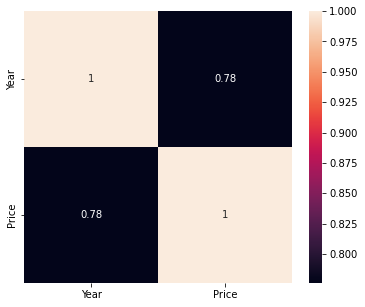

In [43]:
c=df.corr()
plt.subplots(figsize=(6,5))
sns.heatmap(c,annot=True)

Target and independant varible

In [44]:
y=df['Price']
x=df.drop(['Price'],axis=1)

In [45]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [46]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

Traing and Testing Data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

Linear regression

In [24]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [25]:
model=lr.fit(x_train,y_train)

In [26]:
y_pred = model.predict(x_test)
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is :',mean_squared_error(y_test,y_pred))
print('R2 is : ',r2_score(y_test,y_pred))

MSE is : 4326906256.829671
R2 is :  0.36759313425902185


Lasso Regression

In [48]:
lasso= Lasso(alpha=0.01)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [51]:
y_pred_lasso = lasso.predict(x_test)

In [52]:
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

In [53]:
print('Lasso Regression Model1')
print('Mean Squared Error:',mse_lasso)
print('R-squared Score:',r2_lasso)

Lasso Regression Model1
Mean Squared Error: 4326905791.966492
R-squared Score: 0.3675932022019466


Predicting price in 2022

In [55]:
 year=2022
 price_pred_lr = lr.predict([[year]])
 print('Predicted Price (Linear Regression):',price_pred_lr[0])

Predicted Price (Linear Regression): 743601.6159450412


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
year=2022
price_pred_lasso = lasso.predict([[year]])
print('Predicted Price (Lasso Regression):',price_pred_lasso[0])

Predicted Price (Lasso Regression): 743601.5935283154


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


performance




In [61]:
r_squared_1 = 0.36759313425902185
r_squared_2 =  0.3675932022019466

In [63]:
if r_squared_1 > r_squared_2:
  print("Linear Regression is performing with an R-squared value of:",r_squared_1)
else:
  print("Lasso Regression is performing with an R-squared value of:",r_squared_2)  

Lasso Regression is performing with an R-squared value of: 0.3675932022019466
